jupyter nbconvert 4_association.ipynb --to script

cd /data/ch6845/MHC*;screen -S assoc;

for i in {0..10};do python 4_association.py $i;done


Rscript OmnibusTest_BHv5_modified.R logistic data/out_assoc/allergic_disease/step_02.omnibus data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged.fam data/out_assoc/allergic_disease/step_02.aa data/out_assoc/allergic_disease/phenotype.pheomnibus pheno data/out_assoc/allergic_disease/step_02.omnibus.covar header0 NA

5*3=15

for i in {00..10};do python 4_association.py $i;done
for i in {11..20};do python 4_association.py $i;done

for i in {21..30};do python 4_association.py $i;done
for i in {31..40};do python 4_association.py $i;done

for i in {41..50};do python 4_association.py $i;done
for i in {51..60};do python 4_association.py $i;done

for i in {61..70};do python 4_association.py $i;done
for i in {71..80};do python 4_association.py $i;done

for i in {81..90};do python 4_association.py $i;done
for i in {91..101};do python 4_association.py $i;done



for i in {21..40};do python 4_association.py $i;done 
for i in {41..60};do python 4_association.py $i;done 
for i in {61..80};do python 4_association.py $i;done 
for i in {81..101};do python 4_association.py $i;done

Rscript OmnibusTest_BHv5_modified-Copy1.R linear data/out_assoc/age/step_01.omnibus data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged.fam data/out_assoc/age/step_01.aa data/out_assoc/age/phenotype.phe data/out_assoc/age/step_01.omnibus.covar header0,header1,header2,header3 NA

Rscript OmnibusTest_BHv5_modified-Copy1.R linear data/out_assoc/grip_strength/step_01.omnibus data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged.fam data/out_assoc/grip_strength/step_01.aa data/out_assoc/grip_strength/phenotype.phe data/out_assoc/grip_strength/step_01.omnibus.covar header0,header1,header2,header3 NA

Rscript OmnibusTest_BHv5_modified-Copy1.R linear data/out_assoc/cervical_cancer/step_01.omnibus data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged.fam data/out_assoc/cervical_cancer/step_01.aa data/out_assoc/cervical_cancer/phenotype.phe data/out_assoc/cervical_cancer/step_01.omnibus.covar header0,header1,header2,header3 NA

Rscript OmnibusTest_BHv5_modified.R linear data/out_assoc/grip_strength/step_01.omnibus data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged.fam data/out_assoc/grip_strength/step_01.aa data/out_assoc/grip_strength/phenotype.phe data/out_assoc/grip_strength/step_01.omnibus.covar header0,header1,header2,header3 NA

Rscript OmnibusTest_BHv5_modified-Copy1.R logistic data/out_assoc/asthma/step_01.omnibus data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged.fam data/out_assoc/asthma/step_01.aa data/out_assoc/asthma/phenotype.phe data/out_assoc/asthma/step_01.omnibus.covar header0,header1,header2,header3 NA


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6292650/

In [1]:
import os
import sys

import logging
import re
import pathlib

import datetime

import numpy as np
import pandas as pd
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

from pyplink import PyPlink

from basic_tools import *

In [2]:
final_aa_path,final_plink_path,final_plink_aa_path

('data/genotype/4_merge/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele.beagle5.1.AGM.bgl.phased.QC.aa',
 'data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged',
 'data/genotype/4_merge/KCHIP_HLA_AA_SNP_1000G_merged')

# load plink, aa and check integrity

In [3]:
plink_path=final_plink_path
plink_aa_path=final_plink_aa_path
aa_path=final_aa_path

In [4]:
plink=PyPlink(plink_path)
fam=plink.get_fam().astype({'fid':str,'iid':str}).rename(columns={'fid':'FID','iid':'IID'})
bim=plink.get_bim()

In [5]:
plink_aa=PyPlink(plink_aa_path)
fam_aa=plink_aa.get_fam().astype({'fid':str,'iid':str}).rename(columns={'fid':'FID','iid':'IID'})
bim_aa=plink_aa.get_bim()

In [6]:
assert (fam['IID']!=fam_aa['IID']).sum()==0

In [7]:
f=open(aa_path,'r');aa_ind=f.readline().strip().split(' ')[2:];f.close()

In [8]:
aa_ind_1=[aa_ind[i] for i in range(0,len(aa_ind),2)]
aa_ind_2=[aa_ind[i+1] for i in range(0,len(aa_ind),2)]

In [9]:
assert (fam['IID']!=aa_ind_1).sum()==0
assert (fam['IID']!=aa_ind_2).sum()==0

# load phenotype and check integrity

In [10]:
phenotypes=pd.read_csv(pheno_all_file_path,sep='\t')
'  '.join(phenotypes.columns)

'ID  age  sex  asthma  chronic_bronchitis  allergic_disease  stomach_cancer  liver_cancer  colorectal_cancer  breast_cancer  cervical_cancer  lung_cancer  thyroid_cancer  prostate_cancer  bladder_cancer  colon_polyps  angina_pectoris_myocardial_infarction  hypertension  stroke  transient_ischemic_attacks  acute_liver_disease  diabetes  hyperlipidemia  thyroid_disease  arthritis  rheumatoid_arthritis  osteoporosis  parkinson  pwi_total  chronic_gastritis_stomach_ulcer  duodenal_ulcer  urinary_tract_infection  height  hip_circumference  waist_circumference  weight  systolic_blood_pressure  diastolic_blood_pressure  pulse  hysterectomy  menarche_onset_age  menopause_age  menopause_cycle  ovarian_extraction  child_delivery_number  big_baby  small_baby  child_present  child_dead  hematocrit  hemoglobin  platelet  rbc  wbc  mcv  mch  mchc  total_bilirubin  bun  creatinine  blood_in_urine  glucose_in_urine  alt  ast  gtp  total_cholesterol  hdl_cholesterol  hba1c  freet4  tsh  triglyceride  a

In [11]:
phenotypes=phenotypes.set_index('ID').loc[fam.IID]
phenotypes.shape

(125673, 137)

In [12]:
assert (phenotypes.index!=fam['IID']).sum()==0

In [13]:
binary_traits=phenotypes.columns[phenotypes.apply(lambda x: (not 'x_ray' in x.name) & (len(x.value_counts())<3),axis=0)]
binary_traits,len(binary_traits)

(Index(['sex', 'asthma', 'chronic_bronchitis', 'allergic_disease',
        'stomach_cancer', 'liver_cancer', 'colorectal_cancer', 'breast_cancer',
        'cervical_cancer', 'lung_cancer', 'thyroid_cancer', 'prostate_cancer',
        'bladder_cancer', 'colon_polyps',
        'angina_pectoris_myocardial_infarction', 'hypertension', 'stroke',
        'transient_ischemic_attacks', 'acute_liver_disease', 'diabetes',
        'hyperlipidemia', 'thyroid_disease', 'arthritis',
        'rheumatoid_arthritis', 'osteoporosis', 'parkinson',
        'chronic_gastritis_stomach_ulcer', 'duodenal_ulcer',
        'urinary_tract_infection', 'hysterectomy', 'ovarian_extraction',
        'big_baby', 'small_baby', 'blood_in_urine', 'glucose_in_urine',
        'heart_failure', 'peripheral_vascular_diseases', 'cataract', 'glaucoma',
        'renal_failure', 'fatty_liver', 'copd', 'tuberculosis',
        'benign_prostatic_hyperplasia', 'gout', 'fracture',
        'cholelithiasis_cholecystitis', 'periodontal_d

In [14]:
continuous_traits=phenotypes.columns[phenotypes.apply(lambda x: (not 'x_ray' in x.name) & (len(x.value_counts())>=3),axis=0)]
continuous_traits

Index(['age', 'pwi_total', 'height', 'hip_circumference',
       'waist_circumference', 'weight', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'pulse', 'menarche_onset_age',
       'menopause_age', 'menopause_cycle', 'child_delivery_number',
       'child_present', 'child_dead', 'hematocrit', 'hemoglobin', 'platelet',
       'rbc', 'wbc', 'mcv', 'mch', 'mchc', 'total_bilirubin', 'bun',
       'creatinine', 'alt', 'ast', 'gtp', 'total_cholesterol',
       'hdl_cholesterol', 'hba1c', 'freet4', 'tsh', 'triglyceride', 'albumin',
       'hscrp', 'protein_in_urine', 'renin', 'sleep_duration', 'grip_strength',
       'ALP', 'FVC_predicted', 'FEV_predicted', 'FEV_over_FVC_predicted',
       'MVV_predicted', 'bone_density_distal_sos', 'bone_density_midshaft_sos',
       'protein_in_blood', 'glucose_in_blood', 'cohort', 'bmi'],
      dtype='object')

In [15]:
binary_continuous_traits=sorted(binary_traits.union(continuous_traits))
binary_continuous_traits

['ALP',
 'FEV_over_FVC_predicted',
 'FEV_predicted',
 'FVC_predicted',
 'MVV_predicted',
 'acute_liver_disease',
 'age',
 'albumin',
 'allergic_disease',
 'alt',
 'angina_pectoris_myocardial_infarction',
 'arthritis',
 'ast',
 'asthma',
 'benign_prostatic_hyperplasia',
 'big_baby',
 'bladder_cancer',
 'blood_in_urine',
 'bmi',
 'bone_density_distal_sos',
 'bone_density_midshaft_sos',
 'breast_cancer',
 'bun',
 'cataract',
 'cervical_cancer',
 'child_dead',
 'child_delivery_number',
 'child_present',
 'cholelithiasis_cholecystitis',
 'chronic_bronchitis',
 'chronic_gastritis_stomach_ulcer',
 'cohort',
 'colon_polyps',
 'colorectal_cancer',
 'copd',
 'creatinine',
 'diabetes',
 'diastolic_blood_pressure',
 'duodenal_ulcer',
 'fatty_liver',
 'fracture',
 'freet4',
 'glaucoma',
 'glucose_in_blood',
 'glucose_in_urine',
 'gout',
 'grip_strength',
 'gtp',
 'hba1c',
 'hdl_cholesterol',
 'heart_failure',
 'height',
 'hematocrit',
 'hemoglobin',
 'hip_circumference',
 'hscrp',
 'hyperlipidemia'

# parse parameter

In [16]:
if 'ipykernel' in sys.argv[0]:
    ipykernel=True
    phenotype_name='protein_in_urine'
    #phenotype_name='height'
    
else:
    ipykernel=False
    phenotype_name=sys.argv[1]
    if phenotype_name.isdigit():
        phenotype_name=int(phenotype_name)
        phenotype_name=binary_continuous_traits[phenotype_name]

if phenotype_name in binary_traits:
    phenotype_type='binary'
elif phenotype_name in continuous_traits:
    phenotype_type='continuous'        

In [17]:
data_out_assoc_phenotype_path=data_out_assoc_path+phenotype_name+'/'
pathlib.Path(data_out_assoc_phenotype_path).mkdir(parents=True, exist_ok=True)

In [18]:
log = logging.getLogger('logger')
log.setLevel(logging.DEBUG)

log_file_name=datetime.datetime.now().strftime('%Y%m%d_%H%M%S')+'.log'
log_file_path=data_out_assoc_phenotype_path+log_file_name
fileHandler = logging.FileHandler(log_file_path)
streamHandler = logging.StreamHandler()

formatter = logging.Formatter(' %(asctime)s [%(levelname)s] %(lineno)d > %(message)s')
fileHandler.setFormatter(formatter)
streamHandler.setFormatter(formatter)

log.addHandler(fileHandler)
log.addHandler(streamHandler)

In [19]:
log.info("phenotype_name: {}, phenotype_type:{}".format(phenotype_name,phenotype_type))

 2020-02-26 21:06:42,407 [INFO] 1 > phenotype_name: protein_in_urine, phenotype_type:continuous


 2020-02-26 21:06:46,634 [INFO] 27 > ------------------per cohort---------------------------
 2020-02-26 21:06:46,638 [INFO] 31 > cohort: 1,  7579/ 7607 (99.632%)
 2020-02-26 21:06:46,661 [INFO] 43 > Total values: 7579
 2020-02-26 21:06:46,662 [INFO] 27 > ------------------per cohort---------------------------
 2020-02-26 21:06:46,665 [INFO] 31 > cohort: 2,     0/99159 (0.000%)
 2020-02-26 21:06:46,666 [INFO] 41 > cohort 2 ignored. it may due to nonexistence of questionnaire
 2020-02-26 21:06:46,667 [INFO] 43 > Total values: 7579
 2020-02-26 21:06:46,667 [INFO] 27 > ------------------per cohort---------------------------
 2020-02-26 21:06:46,670 [INFO] 31 > cohort: 3, 18293/18907 (96.753%)
 2020-02-26 21:06:46,673 [INFO] 43 > Total values: 25872
 2020-02-26 21:06:46,679 [INFO] 49 > median:0.000, mean: 0.165, std: 0.523, max: 5.000, min: 0.000
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in gre

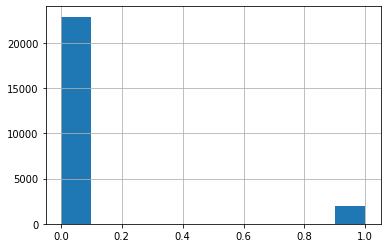

In [20]:
phenotype_define=np.full(len(phenotypes.index),np.nan)

if phenotype_type=='binary':
    for cohort in sorted(phenotypes['cohort'].unique()):
        log.info('------------------per cohort---------------------------')
        cohort_check=(phenotypes['cohort']==cohort)
        cohort_case_check=(phenotypes['cohort']==cohort)&(phenotypes[phenotype_name]==2)
        cohort_control_check=(phenotypes['cohort']==cohort)&(~(phenotypes[phenotype_name]==2))
        log.info('cohort: {}, {:5d}/{:5d} ({:.3f}%)'.format(cohort,cohort_case_check.sum(),cohort_check.sum(),100*cohort_case_check.sum()/cohort_check.sum()))

        if cohort_case_check.sum()>0:
            phenotype_define[cohort_case_check]=2
            phenotype_define[cohort_control_check]=1
        elif np.isnan(cohort):
            raise
            cohort_check_temp=(phenotypes['cohort'].isnull())
            phenotype_define[cohort_check_temp]=-9
            log.info('missing individuals founded: {}'.format(cohort_check_temp.sum()))
        else:
            log.info('cohort {} ignored. it may due to nonexistence of questionnaire'.format(cohort))

        log.info('Total case:'+str((phenotype_define==2).sum()))
    log.info("phenotype defined\n"+str(pd.Series(phenotype_define).value_counts()))
    
elif phenotype_type=='continuous':
    for cohort in sorted(phenotypes['cohort'].unique()):
        log.info('------------------per cohort---------------------------')
        cohort_check=(phenotypes['cohort']==cohort)
        cohort_notnull_check=(phenotypes['cohort']==cohort)&(~(phenotypes[phenotype_name].isnull()))
        #print(cohort_notnull_check,type(cohort_notnull_check))
        log.info('cohort: {}, {:5d}/{:5d} ({:.3f}%)'.format(cohort,cohort_notnull_check.sum(),cohort_check.sum(),100*cohort_notnull_check.sum()/cohort_check.sum()))

        if cohort_notnull_check.sum()>0:
            phenotype_define[cohort_notnull_check]=phenotypes[phenotype_name][cohort_notnull_check]
        elif np.isnan(cohort):
            raise
            cohort_check_temp=(phenotypes['cohort'].isnull())
            phenotype_define[cohort_check_temp]=-9
            log.info('missing individuals founded: {}'.format(cohort_check_temp.sum()))
        else:
            log.info('cohort {} ignored. it may due to nonexistence of questionnaire'.format(cohort))

        log.info('Total values: {}'.format((~np.isnan(phenotype_define)).sum()))
        
    log.info("median:{:.3f}, mean: {:.3f}, std: {:.3f}, max: {:.3f}, min: {:.3f}".format(pd.Series(phenotype_define).median(),
                                                         pd.Series(phenotype_define).mean(),
                                                         pd.Series(phenotype_define).std(),
                                                         pd.Series(phenotype_define).max(),
                                                         pd.Series(phenotype_define).min()
                                                        )
         )
    log.info(">mean+3std:{}, <mean-3std:{}".format((phenotype_define>pd.Series(phenotype_define).mean()+3*pd.Series(phenotype_define).std()).sum(),
                                                (phenotype_define<pd.Series(phenotype_define).mean()-3*pd.Series(phenotype_define).std()).sum()
                                               )
         )
    phenotype_define[phenotype_define>pd.Series(phenotype_define).mean()+3*pd.Series(phenotype_define).std()]=np.nan
    phenotype_define[phenotype_define<pd.Series(phenotype_define).mean()-3*pd.Series(phenotype_define).std()]=np.nan
    
    log.info('Total values: {}'.format((~np.isnan(phenotype_define)).sum()))                                                  
    pd.Series(phenotype_define).hist()

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6708789/
    
age, gender, race, diabetes, hyperlipidemia, hypertension, and all significant alleles.



phenotypes[]
union 
* diabetes
* hyperlipidemia
* hypertension
* allergic_disease
* colon polyps
* rheumatoid_arthritis

-> unhealthy individuals -> if overlap with case-> set as missing

In [21]:
if phenotype_type=='binary' and phenotype_name!='sex':
    unhealthy_individuals=(phenotypes['diabetes']==2)|\
                            (phenotypes['hyperlipidemia']==2)|\
                            (phenotypes['hypertension']==2)|\
                            (phenotypes['allergic_disease']==2)|\
                            (phenotypes['colon_polyps']==2)|\
                            (phenotypes['rheumatoid_arthritis']==2)
    log.info("unhealthy individuals: {}".format(unhealthy_individuals.sum()))
    log.info("unhealthy individuals among control removed: {}".format(((phenotype_define==1) & (unhealthy_individuals)).sum()))
    phenotype_define[(phenotype_define==1) & (unhealthy_individuals)]=np.nan
    ## change to np.nan and test!!
    log.info("phenotype defined\n"+str(pd.Series(phenotype_define).value_counts()))

In [22]:
if phenotype_type=='binary':
    if phenotype_name=='breast_cancer' or phenotype_name=='cervical_cancer':
        log.info('exclude men: {}'.format(((~np.isnan(phenotype_define))&(phenotypes['sex']==1)).sum()))
        phenotype_define[(~np.isnan(phenotype_define))&(phenotypes['sex']==1)]=np.nan
        log.info("phenotype defined\n"+str(pd.Series(phenotype_define).value_counts()))
    elif phenotype_name=='prostate_cancer':
        log.info('exclude women: {}'.format(((~np.isnan(phenotype_define))&(phenotypes['sex']==2)).sum()))
        phenotype_define[(~np.isnan(phenotype_define))&(phenotypes['sex']==2)]=np.nan
        log.info("phenotype defined\n"+str(pd.Series(phenotype_define).value_counts()))

In [23]:
phenotype_define_df=pd.DataFrame(phenotype_define,index=phenotypes.index)

phenotype_define_df=phenotype_define_df.loc[fam['IID']].fillna(-9)

if phenotype_name in binary_traits:
    phenotype_define_df=phenotype_define_df.astype(int)
    
phenotype_define_df_noindex=phenotype_define_df.reset_index().rename(columns={0:'pheno'})

phenotype_define_df_noindex[[phenotype_define_df_noindex.columns[0],phenotype_define_df_noindex.columns[0],phenotype_define_df_noindex.columns[1]]].to_csv(data_out_assoc_phenotype_path+'phenotype.phe',index=None,header=None,sep='\t')
#phenotype_define_df_noindex[[phenotype_define_df_noindex.columns[0],phenotype_define_df_noindex.columns[0],phenotype_define_df_noindex.columns[1]]].to_csv(data_out_assoc_phenotype_path+'phenotype.pheomnibus',index=None,sep='\t')

In [24]:
phenotype_define_df_noindex.shape

(125673, 2)

In [25]:
assert (phenotype_define_df_noindex['pheno']==np.nan).sum()==0
if phenotype_type=='binary':
    log.info(phenotype_define_df_noindex['pheno'].value_counts())
elif phenotype_type=='continuous':
    log.info(phenotype_define_df_noindex['pheno'].value_counts().iloc[:5])
    log.info('...')
    log.info(phenotype_define_df_noindex['pheno'].value_counts().iloc[-5:])
else:
    raise

 2020-02-26 21:07:03,257 [INFO] 5 > -9.0    100777
 0.0     22921
 1.0      1975
Name: pheno, dtype: int64
 2020-02-26 21:07:03,262 [INFO] 6 > ...
 2020-02-26 21:07:03,265 [INFO] 7 > -9.0    100777
 0.0     22921
 1.0      1975
Name: pheno, dtype: int64


# Association

In [26]:
#os.system(("head -n5 {} | awk '{{print "+','.join(['$'+str(i) for i in range(1,300+2+1)])+"}}'> {}").format(bmarker_aa_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(1)))
#os.system("grep ' AA_' {} | awk '{{print "+','.join(['$'+str(i) for i in range(1,300+2+1)])+"}}'>> {}".format(bmarker_aa_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(1)))
#!head -n{150+1} {data_out_assoc_phenotype_path+'phenotype.pheomnibus'} > {data_out_assoc_phenotype_path+'phenotype_test.pheomnibus'}
#!head -n{150} {data_out_assoc_phenotype_path+'phenotype.phe'} > {data_out_assoc_phenotype_path+'phenotype_test.phe'}
#!head -n{150} {bmarker_plink_path+'.fam'} > {bmarker_plink_path+'_test.fam'}

https://stackoverflow.com/questions/24369307/r-read-table-extremely-slow
https://csgillespie.github.io/efficientR/5-3-importing-data.html
https://m.blog.naver.com/PostView.nhn?blogId=urimee_e&logNo=220668022907&proxyReferer=https%3A%2F%2Fwww.google.com%2F

Rscript OmnibusTest_BHv5_modified.R logistic data/out_assoc/asthma/step_00.omnibus data/genotype/3_bmarkerphased/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele_test.fam data/out_assoc/asthma/genotype_test.aa data/out_assoc/asthma/phenotype.pheomnibus pheno - - NA

Rscript OmnibusTest_BHv5.R logistic data/out_assoc/asthma/step_00.omnibus data/genotype/3_bmarkerphased/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele_test.fam data/out_assoc/asthma/genotype_test.aa data/out_assoc/asthma/phenotype.pheomnibus pheno - - NA

In [28]:
gene_assign=bim_aa[['pos']]
HLA_names=np.unique([i[0].split('_')[1] for i in bim_aa[bim_aa.index.str.contains('HLA_')].index.str.split('*')])

for HLA_name in HLA_names:
    gene_assign[HLA_name]=0
    gene_select=gene_assign[gene_assign.index.str.contains('HLA_'+HLA_name)|gene_assign.index.str.contains('SNPS_'+HLA_name)|gene_assign.index.str.contains('AA_'+HLA_name)]#print(gene_select.sort_values('pos').iloc[0],gene_select.sort_values('pos').iloc[-1])
    gene_assign[HLA_name][(gene_assign['pos']>=gene_select['pos'].min())&(gene_assign['pos']<=gene_select['pos'].max())]=1
gene_assign    

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://p

,pos,A,B,C,DPA1,DPB1,DQA1,DQB1,DRB1
snp,,,,,,,,,
6:28000361_T/C,28000361,0,0,0,0,0,0,0,0
6:28000610_C/A,28000610,0,0,0,0,0,0,0,0
6:28001003_A/C,28001003,0,0,0,0,0,0,0,0
6:28001033_T/C,28001033,0,0,0,0,0,0,0,0
6:28001610_T/C,28001610,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6:34997188_C/T,34997188,0,0,0,0,0,0,0,0
6:34997259_G/A,34997259,0,0,0,0,0,0,0,0
6:34997606_T/A,34997606,0,0,0,0,0,0,0,0


In [29]:
#SNPS_C_788_31347040_exon3

In [42]:
marker_test='6:31180554_GAAC/G'#'6:30165273_C/T'
#marker_test='SNPS_DPB1_10095_33161891_intron4'
#marker_test='6:32520764_G/C'
from pyplink import PyPlink
pd.Series(PyPlink(plink_path).get_geno_marker(marker_test)).value_counts()

0    96354
1    27368
2     1951
dtype: int64

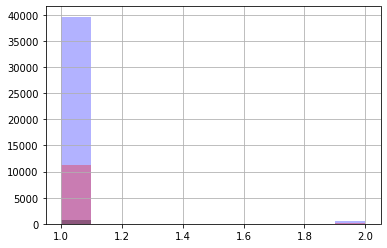

In [43]:
pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==0]).hist(color='b',alpha=0.3)
pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==1]).hist(color='r',alpha=0.3)
pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==2]).hist(color='k',alpha=0.3)

In [44]:
pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==0]).mean()

1.0122580162941923

1.0122580162941923


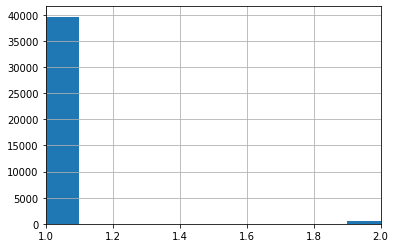

In [45]:
pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==0]).hist()
plt.xlim(pd.Series(phenotype_define).min(),pd.Series(phenotype_define).max())
print(pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==0]).mean())

1.0112300403579575


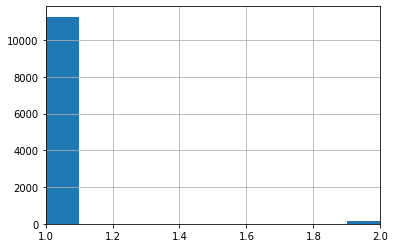

In [46]:
pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==1]).hist()
plt.xlim(pd.Series(phenotype_define).min(),pd.Series(phenotype_define).max())
print(pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==1]).mean())

1.0134803921568627


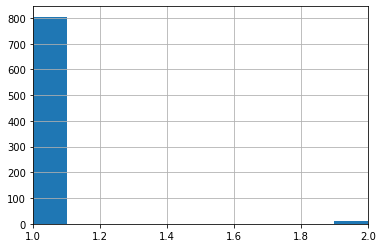

In [47]:
pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==2]).hist()
plt.xlim(pd.Series(phenotype_define).min(),pd.Series(phenotype_define).max())
print(pd.Series(phenotype_define[plink_aa.get_geno_marker(marker_test)==2]).mean())

In [37]:
phenotypes['cohort'].unique()

array([3, 1, 2])

In [ ]:
conditional_variant_list=[] #save peak variants for each step

for idx in range(1,10+1):
    log.info("############################################  STEP {}  ############################################".format(idx))
    log.info("##########################  STEP {}-1 Prepare input (covar,cond,etc.)  ###################################".format(idx))
    #Initialize *.aa
    if os.path.exists('{}'.format(data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx))):
        command='rm {}'.format(data_out_assoc_phenotype_path+'step_{:02d}*'.format(idx))
        log.info(command);os.system(command)
    
    #command='cp {} {}'.format()
    #print(command);os.system(command)
    
    command='head -n5 {} > {}'.format(aa_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx))
    log.info(command); assert os.system(command)==0
    
    command='grep " AA_" {} >> {}'.format(aa_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx))
    log.info(command); assert os.system(command)==0

    
    #Initialize conditional
    conditional_omnibus_list=[]
    conditional_plink_list=[]
    conditional_plink_phased_list=[]
    
    #Initialize covariate
    #covariate_plink=pd.DataFrame(index=phenotypes.index) 
    #covariate_omnibus=pd.DataFrame(index=phenotypes.index) 
    
    covariate_plink=pd.read_csv(PC_path,sep='\t').set_index('ID').loc[fam['IID']]
    covariate_plink['age']=phenotypes['age']
    covariate_plink['sex']=phenotypes['sex']
    #covariate_plink['AS']=phenotypes['cohort'].replace(1,1).replace(2,0).replace(3,0)
    #covariate_plink['CT']=phenotypes['cohort'].replace(1,0).replace(2,1).replace(3,0)
    #covariate_plink['NC']=phenotypes['cohort'].replace(1,0).replace(2,0).replace(3,1)
    
    covariate_omnibus=pd.read_csv(PC_path,sep='\t').set_index('ID').loc[fam['IID']]
    covariate_omnibus['age']=phenotypes['age']
    covariate_omnibus['sex']=phenotypes['sex']
    #covariate_omnibus['AS']=phenotypes['cohort'].replace(1,1).replace(2,0).replace(3,0)
    #covariate_omnibus['CT']=phenotypes['cohort'].replace(1,0).replace(2,1).replace(3,0)
    #covariate_omnibus['NC']=phenotypes['cohort'].replace(1,0).replace(2,0).replace(3,1)    
    
    log.info("##########################  STEP {}-1-1 conditional variant expansion (assign to a HLA gene)  ###################################".format(idx))
    log.info("conditional_variant_list:"+str(conditional_variant_list))
    conditional_variant_list_expand=[]
    #expand
    for assoc_type,conditional_variant in conditional_variant_list:
        log.info('expanding {}'.format(conditional_variant))
        if assoc_type=='omnibus':
            for variant_name in np.unique(['_'.join(variant.split('_')[:3]) for variant in bim_aa[bim_aa.index.str.contains('AA_'+conditional_variant.split('_')[1]+'_')].index.tolist()]):#AA
                conditional_variant_list_expand.append(("omnibus",variant_name))
                log.info('found {}'.format(variant_name))
            for variant_name in bim_aa[bim_aa.index.str.contains('HLA_'+conditional_variant.split('_')[1]+'\*')].index:#HLA
                conditional_variant_list_expand.append(("plink",variant_name))
                log.info('found {}'.format(variant_name))
        elif assoc_type=='plink':
            if conditional_variant[:3]=='HLA':
                for variant_name in np.unique(['_'.join(variant.split('_')[:3]) for variant in bim_aa[bim_aa.index.str.contains('AA_'+conditional_variant[4:].split('*')[0]+'_')].index.tolist()]):#AA
                    conditional_variant_list_expand.append(("omnibus",variant_name))
                    log.info('found {}'.format(variant_name))
                for variant_name in bim_aa[bim_aa.index.str.contains('HLA_'+conditional_variant[4:].split('*')[0]+'\*')].index:#HLA
                    conditional_variant_list_expand.append(("plink",variant_name))                
                    log.info('found {}'.format(variant_name))
            else:#SNPs
                conditional_variant_list_expand.append(("plink",conditional_variant))
                log.info('found {}'.format(conditional_variant))
                
                r2_list=[]
                for idx_bim,(SNP,row) in enumerate(bim_aa.iterrows()):
                    r2=pearsonr(plink_aa.get_geno_marker(conditional_variant),plink_aa.get_geno_marker(SNP))[0]**2
                    r2_list.append(r2)
                r2_df=pd.DataFrame(r2_list,index=bim_aa.index)    

                gene_assign_count=gene_assign[r2_df[0]>0.7].sum(axis=0).iloc[1:]    
                log.info("found HLA gene with LD \n "+str(gene_assign_count))
                
                for HLA_type in gene_assign_count[gene_assign_count>0].index.tolist():
                    for variant_name in np.unique(['_'.join(variant.split('_')[:3]) for variant in bim_aa[bim_aa.index.str.contains('AA_'+HLA_type+'_')].index.tolist()]):#AA
                        conditional_variant_list_expand.append(("omnibus",variant_name))
                        log.info('found {}'.format(variant_name))
                    for variant_name in bim_aa[bim_aa.index.str.contains('HLA_'+HLA_type+'\*')].index:#HLA
                        conditional_variant_list_expand.append(("plink",variant_name))
                        log.info('found {}'.format(variant_name))
        else:
            raise
    log.info("conditional_variant_list_expand: "+str(conditional_variant_list_expand))
    log.info("##########################  STEP {}-1-2 conditional variant -> omnibus,plink,plink_phased  ###################################".format(idx))
    #Split conditional
    for assoc_type,conditional_variant in conditional_variant_list_expand:
        if assoc_type=='omnibus':
            conditional_omnibus_list.append(conditional_variant)
            log.info("{} -> omnibus".format(conditional_variant))
        elif assoc_type=='plink':
            if os.path.exists('{}temp.aa'.format(data_out_assoc_phenotype_path)):
                os.system('rm {}temp.aa'.format(data_out_assoc_phenotype_path))
            os.system('grep "{} " {} > {}temp.aa'.format(conditional_variant.replace('*','\*'),aa_path,data_out_assoc_phenotype_path));f=open('{}temp.aa'.format(data_out_assoc_phenotype_path),'r');lines=f.readlines();f.close();os.system('rm {}temp.aa'.format(data_out_assoc_phenotype_path))
            if len(lines)==0:
                conditional_plink_list.append(conditional_variant)
                log.info("{} -> plink".format(conditional_variant))
            elif len(lines)==1:
                conditional_plink_phased_list.append(conditional_variant)
                log.info("{} -> plink_phased".format(conditional_variant))
            else:
                raise
        else:
            raise

    conditional_omnibus_list=list(np.unique(conditional_omnibus_list))
    conditional_plink_list=list(np.unique(conditional_plink_list))
    conditional_plink_phased_list=list(np.unique(conditional_plink_phased_list))
    
    log.info('conditional_omnibus_list: '+str(conditional_omnibus_list))
    log.info('conditional_plink_list: '+str(conditional_plink_list))
    log.info('conditional_plink_phased_list: '+str(conditional_plink_phased_list))
    
    
    #Process condition
    #(1) Omnibus AA peak
    log.info("##########################  STEP {}-1-3 process conditional_omnibus_list  ###################################".format(idx))
    
    
    for conditional_variant in conditional_omnibus_list:
        log.info("Process {}".format(conditional_variant))
        #individual_list=fam.IID#pd.read_csv(plink_path+'.fam',header=None,sep=' ')[1]
        if os.path.exists('{}temp.aa'.format(data_out_assoc_phenotype_path)):
            os.system('rm {}temp.aa'.format(data_out_assoc_phenotype_path))
        os.system('grep "{} " {} > {}temp.aa'.format(conditional_variant.replace('*','\*'),aa_path,data_out_assoc_phenotype_path));f=open('{}temp.aa'.format(data_out_assoc_phenotype_path),'r');lines=f.readlines();f.close();os.system('rm {}temp.aa'.format(data_out_assoc_phenotype_path))
        marker_name=lines[0].split(' ')[1]
        assert marker_name==conditional_variant;assert len(lines)==1
        aa_call_list=np.array(lines[0].strip().split(' ')[2:])
        aa_call_list_group=np.array([(aa_call_list[i],aa_call_list[i+1]) for i in range(0,len(aa_call_list),2)])

        residue_dosage_all=pd.DataFrame(index=fam.IID)
        for residue in np.unique(aa_call_list):
            log.info("residue {} ".format(residue)+("skipped" if residue=='NA' else "dosage count"))
            if residue=="NA":
                continue
            residue_dosage=pd.Series(0,index=fam.IID)
            residue_dosage.loc[(aa_call_list_group[:,0]==residue)]+=1
            residue_dosage.loc[(aa_call_list_group[:,1]==residue)]+=1
            residue_dosage_all[residue]=residue_dosage
        log.info("ignored {} among \n{}".format(residue_dosage_all.sum().sort_values(ascending=True).index[-1],residue_dosage_all.sum().sort_values(ascending=True)))

        residue_dosage_all_excluded=residue_dosage_all[residue_dosage_all.sum().sort_values(ascending=True)[:-1].index]#exclude the most frequent residue
        for residue,row in residue_dosage_all_excluded.items():
            covariate_plink[conditional_variant+'_'+residue]=row        
        log.info("plink covariate "+str(covariate_plink.columns))    
        
    #(2) Plink unphased peak (1000G-SNP)
    log.info("##########################  STEP {}-1-4 process conditional_plink_list  ###################################".format(idx))
    for conditional_variant in conditional_plink_list:
        log.info("** process {}".format(conditional_variant))
        dosage=plink.get_geno_marker(conditional_variant).astype(float)
        dosage[dosage==-1]=np.nan
        covariate_omnibus[conditional_variant]=dosage
        log.info("added dosage of {} to omnibus covariate".format(conditional_variant))
        
    #(3) Plink phased peak (KCHIP-HLA, SNP)
    log.info("##########################  STEP {}-1-5 process conditional_plink_phased_list  ###################################".format(idx))
    for conditional_variant in conditional_plink_phased_list:
        log.info("** process {}".format(conditional_variant))
        #Attach to aa file
        if os.path.exists('{}temp.aa'.format(data_out_assoc_phenotype_path)):
            os.system('rm {}temp.aa'.format(data_out_assoc_phenotype_path));
        
        os.system('grep "{} " {} > {}temp.aa'.format(conditional_variant.replace('*','\*'),aa_path,data_out_assoc_phenotype_path));f=open('{}temp.aa'.format(data_out_assoc_phenotype_path),'r');lines=f.readlines();f.close();assert len(lines)==1
        os.system('cat {}temp.aa >> {}'.format(data_out_assoc_phenotype_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx)))
        os.system('rm {}temp.aa'.format(data_out_assoc_phenotype_path))
        log.info("added phased information of {} to aa file".format(conditional_variant))
    
    
    
    log.info("##########################  STEP {}-1-6 save covariate, condition  ###################################".format(idx))
    log.info('convarite_omnibus: '+str(covariate_omnibus.columns[:] if len(covariate_omnibus.columns)!=0 else []))
    log.info('convarite_plink: '+str(covariate_plink.columns[:] if len(covariate_plink.columns)!=0 else []))
    
    
    
    covariate_plink=covariate_plink.reset_index()
    if covariate_plink.shape[1]>1:
        covariate_plink[[covariate_plink.columns[0],covariate_plink.columns[0]]+covariate_plink.columns[1:].values.tolist()].fillna(-9).to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.covar'.format(idx),index=None,sep='\t')
        #covariate_plink[[covariate_plink.columns[0],covariate_plink.columns[0]]].to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.covar'.format(idx),index=None,sep='\t')
    
    
    
    covariate_omnibus.columns=['header{}'.format(i) for i in range(len(covariate_omnibus.columns))]
    covariate_omnibus=covariate_omnibus.reset_index()
    if covariate_omnibus.shape[1]>1:
        covariate_omnibus[covariate_omnibus.columns[1:]].to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.covar'.format(idx),index=None,sep='\t',na_rep='NA')
        #covariate_omnibus[[covariate_omnibus.columns[0]]].to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.covar'.format(idx),index=None,sep='\t')
    
    pd.Series(conditional_plink_list+conditional_plink_phased_list).to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.cond'.format(idx),index=None,sep='\t')
    #pd.Series(conditional_omnibus_list).to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.cond'.format(idx))
    
    #Run plink association test
    log.info("#########################################  STEP {}-2 Plink Association  #########################################".format(idx))
    command='plink --bfile {bfile} --assoc {assoc_mode} --pheno {pheno} {covar_on} {covar} --condition-list {condition_list} --out {out} '.format(bfile=plink_path,
                                                                                                                        assoc_mode='--logistic' if phenotype_type=='binary' else '--linear',
                                                                                                                         pheno=data_out_assoc_phenotype_path+'phenotype.phe',
                                                                                                                         covar_on='--covar' if len(covariate_plink.columns[1:])!=0 else '',
                                                                                                                         covar=data_out_assoc_phenotype_path+'step_{:02d}.plink.covar'.format(idx) if len(covariate_plink.columns[1:])!=0 else '',
                                                                                                                         condition_list=data_out_assoc_phenotype_path+'step_{:02d}.plink.cond'.format(idx),
                                                                                                                         out=data_out_assoc_phenotype_path+'step_{:02d}.plink'.format(idx)                                                                         
                                                                                                                        )
    log.info(command)
    stdout,stderr=run_subprocess(command,dry=False)
    log.info(stdout)
    log.error(stderr)
    
    
    log.info("#########################################  STEP {}-3 Omnibus Association  #########################################".format(idx))
    #Run omnibus association test
    command='Rscript OmnibusTest_BHv5_modified.R {assoc_mode} {output} {fam} {aa} {phe} {covar} {covarname} {condvar}'.format(assoc_mode='logistic' if phenotype_type=='binary' else 'linear',
                                                                                                                         output=data_out_assoc_phenotype_path+'step_{:02d}.omnibus'.format(idx),
                                                                                                                         aa=data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx),
                                                                                                                         fam=plink_path+'.fam',
                                                                                                                         phe=data_out_assoc_phenotype_path+'phenotype.phe',
                                                                                                                         covar=data_out_assoc_phenotype_path+'step_{:02d}.omnibus.covar'.format(idx) if len(covariate_omnibus.columns[1:])!=0 else 'NA',
                                                                                                                         covarname=','.join(covariate_omnibus.columns[1:]) if len(covariate_omnibus.columns[1:])!=0 else 'NA',
                                                                                                                         condvar=','.join(conditional_omnibus_list+conditional_plink_phased_list) if len(conditional_omnibus_list+conditional_plink_phased_list)!=0 else 'NA'
                                                                                                                        )
    log.info(command)
    stdout,stderr=run_subprocess(command,dry=False)
    log.info(stdout)
    log.error(stderr)
    
    
    log.info("#########################################  STEP {}-4 Result Save  #########################################".format(idx))
    
    #Data save
    plink_assoc_result=parse_plink_assoc(data_out_assoc_phenotype_path+'step_{:02d}.plink.{}assoc'.format(idx,'' if phenotype_type=='binary' else 'q'))
    plink_assoc_result.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.{}assoc.munged'.format(idx,'' if phenotype_type=='binary' else 'q'))
    plink_assoc_result_sorted=plink_assoc_result.sort_values('P')    
    plink_assoc_result_sorted.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.{}assoc.sorted_'.format(idx,'' if phenotype_type=='binary' else 'q'),sep='\t',index=None)    
    
    plink_assoc_result=parse_plink_assoc(data_out_assoc_phenotype_path+'step_{:02d}.plink.assoc.{}'.format(idx,'logistic' if phenotype_type=='binary' else 'linear'))
    plink_assoc_result=plink_assoc_result[plink_assoc_result['TEST']=='ADD']
    plink_assoc_result.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.assoc.{}.munged'.format(idx,'logistic' if phenotype_type=='binary' else 'linear'))
    plink_assoc_result_sorted=plink_assoc_result.sort_values('P')    
    plink_assoc_result_sorted.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.assoc.{}.sorted'.format(idx,'logistic' if phenotype_type=='binary' else 'linear'),sep='\t',index=None)
    
    omnibus_assoc_result=pd.read_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.assoc'.format(idx),sep='\t')
    omnibus_assoc_result.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.assoc.munged'.format(idx),sep='\t',index=None)
    omnibus_assoc_result_sorted=omnibus_assoc_result.sort_values('P')
    omnibus_assoc_result_sorted.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.assoc.sorted'.format(idx),sep='\t',index=None)
    
    #Identify Peak variant
    log.info("Plink association result")
    log.info(plink_assoc_result_sorted.head(5))
    log.info("Omnibus association result")
    log.info(omnibus_assoc_result_sorted.head(5))
    
    if plink_assoc_result_sorted.iloc[0]['P'] < omnibus_assoc_result_sorted.iloc[0]['P']:
        variant_name=plink_assoc_result_sorted.iloc[0]['SNP']
        log.info('Plink win!!! {}'.format(variant_name))
        conditional_variant_list.append(("plink",variant_name))        
        if plink_assoc_result_sorted.iloc[0]['P']>5e-8:
            log.info('p-value of {}({}) is larger than 5x10^-8. finish conditional analysis'.format(variant_name,plink_assoc_result_sorted.iloc[0]['P']))
            break
    else:
        variant_name=omnibus_assoc_result_sorted.iloc[0]['Variant']
        log.info('Omnibus win!!! {}'.format(variant_name))
        conditional_variant_list.append(("omnibus",variant_name))
        if omnibus_assoc_result_sorted.iloc[0]['P']>5e-8:
            log.info('p-value of {}({}) is larger than 5x10^-8. finish conditional analysis'.format(variant_name,omnibus_assoc_result_sorted.iloc[0]['P']))
            break
    